In [2]:
Pkg.add("OrdinaryDiffEq")
Pkg.add("PyPlot")
Pkg.checkout("DiffEqBase")
Pkg.checkout("OrdinaryDiffEq")
Pkg.update()

INFO: Nothing to be done
INFO: Cloning cache of LaTeXStrings from https://github.com/stevengj/LaTeXStrings.jl.git
INFO: Cloning cache of PyCall from https://github.com/JuliaPy/PyCall.jl.git
INFO: Cloning cache of PyPlot from https://github.com/JuliaPy/PyPlot.jl.git
INFO: Installing LaTeXStrings v0.2.1
INFO: Installing PyCall v1.12.0
INFO: Installing PyPlot v2.3.2
INFO: Building Conda
INFO: Building PyCall
INFO: PyCall is using python (Python 3.6.1) at /usr/bin/python, libpython = /usr/lib/libpython3.6m
INFO: /home/neveritt/.julia/v0.5/PyCall/deps/deps.jl has been updated
INFO: /home/neveritt/.julia/v0.5/PyCall/deps/PYTHON has been updated
INFO: Package database updated
INFO: Checking out DiffEqBase master...
INFO: Pulling DiffEqBase latest master...
INFO: No packages to install, update or remove
INFO: Checking out OrdinaryDiffEq master...
INFO: Pulling OrdinaryDiffEq latest master...
INFO: No packages to install, update or remove
INFO: Updating METADATA...
INFO: Updating cache of DataF

In [6]:
include("../SystemsBase.jl/src/SystemsBase.jl")
using SystemsBase
using DiffEqBase, OrdinaryDiffEq
using Plots
pyplot();

INFO: Recompiling stale cache file /home/neveritt/.julia/lib/v0.5/DiffEqBase.ji for module DiffEqBase.
INFO: Recompiling stale cache file /home/neveritt/.julia/lib/v0.5/OrdinaryDiffEq.ji for module OrdinaryDiffEq.
INFO: Precompiling module PyPlot.


In [8]:
A = [-0.313    56.7   0;
     -0.0139  -0.426  0;
      0        56.7   0];
B = [ 0.232 0.0203 0].'
C = [0 0 1]
D = 0

# generate statespace model
s1 = ss(A,B,C,D)

SystemsBase.StateSpace{Val{:siso},Val{:cont},Array{Float64,2},Array{Float64,2},Array{Int64,2},Array{Int64,2}}([-0.313 56.7 0.0; -0.0139 -0.426 0.0; 0.0 56.7 0.0],[0.232; 0.0203; 0.0],[0 0 1],[0],3,1,1,0.0)


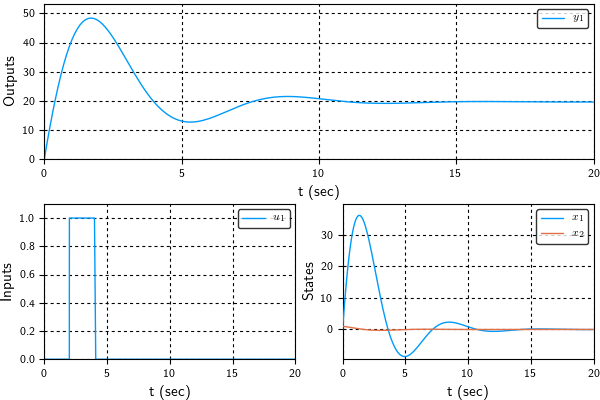

In [9]:
inputf(t,x) = (2*one(t) ≤ t ≤ 4*one(t)) ? one(t) : zero(t)

sln = simulate(s1, (0.,20.), tstops = [2.,4.], input = inputf, dtmax = 1E-1, initial = [0;1;0])
plot(sln, inputs = [1], states = [1,2], layout = @layout([a; [b c]]))

In [10]:
animate(sln, "response.gif", inputs = [1], states = [1,2], every = divrem(length(sln.t), 40)[1])

INFO: Saved animation to /home/neveritt/Documents/GITrepos/JuliaSystems/ACC-2017/response.gif


Plots.AnimatedGif("/home/neveritt/Documents/GITrepos/JuliaSystems/ACC-2017/response.gif")

In [11]:
A = diagm([0.3,0.6,0.9])
B = [1 2 3].'
C = [1/3 1/3 1/3]
D = 0

s2 = ss(A,B,C,D,0.05)

SystemsBase.StateSpace{Val{:siso},Val{:disc},Array{Float64,2},Array{Int64,2},Array{Float64,2},Array{Int64,2}}([0.3 0.0 0.0; 0.0 0.6 0.0; 0.0 0.0 0.9],[1; 2; 3],[0.333333 0.333333 0.333333],[0],3,1,1,0.05)


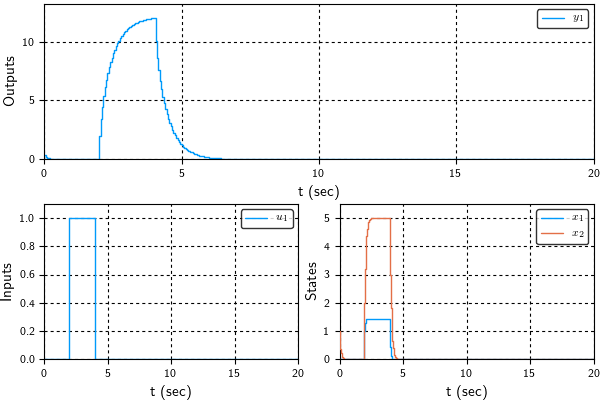

In [12]:
sln = simulate(s2, (0.,20.), initial = [0;1;0]) do t, x
  (2*one(t) ≤ t ≤ 4*one(t)) ? one(t) : zero(t)
end
plot(sln, inputs = [1], states = [1,2], layout = @layout([a; [b c]]))

In [ ]:
A = diagm([0.3,0.6,0.9])
B = [1 2 3].'
C = [1/3 1/3 1/3]

type SimType{T} <: DEDataArray{T}
    x::Vector{T}
    y::Vector{T}
    u::Vector{T}
end

function mysystem(t,x,dx,u)
    ucalc = u(t,x)
    x.u = ucalc
    x.y = C*x.x
    dx[:] = A*x.x + B*x.u
end

In [ ]:
input = (t,x)->(1*one(t)≤t≤2*one(t)?[one(t)]:[zero(t)])
prob = DiscreteProblem((t,x,dx)->mysystem(t,x,dx,input), SimType(zeros(3), zeros(1), zeros(1)), (0.,4.))
sln = solve(prob, FunctionMap(scale_by_time=false), dt = 0.1)

In [ ]:
# plot(sln)

In [ ]:
u1 = [sln[idx].u for idx in 1:length(sln)]
u2 = [sln(t).u for t in linspace(0,4,41)]
any(x->x[1]>0, u1)

In [ ]:
any(x->x[1]>0, u2)